In [2]:
# 기본 패키지 설치
!pip install numpy pandas matplotlib

# nltk
!pip install nltk
# Gensim 및 의존 패키지 설치
!pip install gensim

# spaCy 및 언어 모델 설치
!pip install spacy
!python -m spacy download en_core_web_sm

# 시각화 툴 설치 (pyLDAvis)
!pip install pyLDAvis

# stopwords 등 nltk 리소스 다운로드
import nltk
nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 1.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 1.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20430 sha256=c47c5271c3815d19f6a9ca18e220cb32d175f820efcb06e2da7a43b386453d4a
  Stored in directory: /home/lhshrk/.cache/pip/wheels/d7/1e/9c/3c352867b1bb1ddba0e51149a0d06c1e50c1c9b1c5ebcac787
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3513 sha256=05e9ccf07d910b830037f47f5caeadd76fdabc6668f255124895d806a9159049
  Stored in directory: /home/lhshrk/.cache/pip/wheels/37/45/a2/db878712db97aaab6f574d750789bc6c99e3b706af8af6b936
Successfully built fst-pso miniful
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling

[nltk_data] Downloading package stopwords to /home/lhshrk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

01. import pck

In [125]:
## basic
import re
import numpy as np
import pandas as pd
from pprint import pprint

## nltk
import nltk
nltk.download('stopwords')

## Mallet
# import os 
# from gensim.models.wrappers import LdaMallet

# os.environ['MALLET_HOME'] = '/home/lhshrk/py-TopicModeling/Mallet'

## Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /home/lhshrk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


02. import dataset

In [126]:
rawdata = pd.read_csv('/home/lhshrk/bim_gis_integration_LDA_analysis/data/dataset2_20250224.csv', encoding='cp949')
documents = pd.DataFrame(rawdata)
documents.head()
len(documents)

409

03. data preprocessing - lower(소문자 변환)

In [127]:
documents['whole_lower'] = documents['whole'].str.lower()
documents['whole2_lower'] = documents['whole2'].str.lower()

# 결과를 확인
documents.tail()

# 수정된 파일 저장 (필요한 경우)
# documents.to_csv('your_file_with_lower.csv', index=False)

,Div,Authors,Title,Keywords,Abstract,Publication_Year,WoS_Categories,Research_Areas,whole,whole2,whole_lower,whole2_lower
404,domestic,Junseok Kim;Seongjae Yoo;Jijun Lee,A Linkage between IndoorGML and CityGML using ...,"IndoorGML, CityGML, Indoor Geoinformation, Ind...",Recently indoor navigation with indoor map suc...,2014,Korea Spatial Information Society (KSIS),General other engineering,A Linkage between IndoorGML and CityGML using ...,A Linkage between IndoorGML and CityGML using ...,a linkage between indoorgml and citygml using ...,a linkage between indoorgml and citygml using ...
405,domestic,Lam Phuoc Dat;Han Jeong-gyu;Kwon Ki-ryong;Ok S...,Semantic 3D City Model Data Visualization for ...,"Smart City Digital Twin, 3D City Model, Cesium...",Digital Twin has gotten much attention from th...,2023,Korea Multimedia Society,Electronics/Information and Communication Engi...,Semantic 3D City Model Data Visualization for ...,Semantic 3D City Model Data Visualization for ...,semantic 3d city model data visualization for ...,semantic 3d city model data visualization for ...
406,domestic,Young-Chan Lee; Sang-Hoon Lee; Chang-Taek Hyun...,Development of Light-weight Smart City Digital...,"Digital twin, Game engine, Lightweight 3D mode...","Recently, it has been getting an increasing at...",2021,Society for Computational Design and Engineering,mechanical engineering,Development of Light-weight Smart City Digital...,Development of Light-weight Smart City Digital...,development of light-weight smart city digital...,development of light-weight smart city digital...
407,domestic,Kim Mi-seon; Choi Hyun-sang; Lee Ji-young,Comparative Analysis of Building Models to Dev...,"Indoor Feature Model, Indoor Feature Class, 3D...","Around the world, there is an increasing inter...",2021,"Korean Society Of Subveying Geodecy, Photogram...",civil engineering,Comparative Analysis of Building Models to Dev...,Comparative Analysis of Building Models to Dev...,comparative analysis of building models to dev...,comparative analysis of building models to dev...
408,domestic,Hyunjin Lee;Hyeyoung Kim;Cheolmin Jeon,An Indoor Space Management System using a Spat...,"3D GIS, 3D model, spatial DBMS, indoor spatial...",Most 3D models found in the literature focus o...,2009,Korea Spatial Information Society (KSIS),civil engineering,An Indoor Space Management System using a Spat...,An Indoor Space Management System using a Spat...,an indoor space management system using a spat...,an indoor space management system using a spat...


04. data preprocessing - all

In [16]:
!python3 -m spacy download en
!python -m spacy download en_core_web_md

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 1.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [173]:
# nltk stopwords 다운로드
nltk.download('stopwords')
from nltk.corpus import stopwords

# 분석할 컬럼 'whole' 선택 및 리스트 변환
data = documents.whole_lower.values.tolist()

# ===== 02. 불용어(stopwords) 준비 =====
stop_words = stopwords.words('english')
stop_words.extend(['example', 'research', 'report', 'approach', 'result', 'trend', 'trends', 'from', 'subject', 're', 'edu', 'use', 'ealry', 'current', 'late', 'korean', 'korea'])

# ===== 03. 데이터 전처리 =====

# (A) 기본적인 텍스트 클리닝

# 이메일 주소 제거
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# 줄바꿈 문자 제거
data = [re.sub('\s+', ' ', sent) for sent in data]

# 따옴표 제거
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

# (B) 문장 토큰화 (Tokenization)

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # 구두점 제거

data_words = list(sent_to_words(data))
print(data_words[:1])

# (C) Bigram 및 Trigram 모델 구축

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[data_words[0]]])

# (D) 추가 함수 정의: stopwords 제거, bigrams/trigrams, Lemmatization

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append(
            [token.lemma_ for token in doc 
             if token.pos_ in allowed_postags and token.lemma_ not in stop_words]
        )
    return texts_out

# Lemmatization 실행


# (E) 최종 전처리: 불용어 제거 → bigram 형성 → Lemmatization

# 불용어 제거
data_words_nostops = remove_stopwords(data_words)

# Bigram 형성
data_words_bigrams = make_bigrams(data_words_nostops)

# spaCy 모델 로드 (표제어 추출을 위해 필요)
# python3 -m spacy download en_core_web_md
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

# Lemmatization 실행 (명사, 형용사, 동사, 부사만)
data_lemmatized = lemmatization(data_words_bigrams)

# 결과 확인
pprint(data_lemmatized[:1])


[nltk_data] Downloading package stopwords to /home/lhshrk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['trends in bim and gis standard - report from the joint '
 'iso/tc59/sc13-iso/tc211 wg: gis bim bim; gis; interoperability; standard ; '
 'technical report; iso; ogc; buildingsmart this paper for the keynotes of the '
 'mvpbim 2022 conference gives an overview of the current standard efforts in '
 'the gis/bim context. the motivation for this paper is to strengthen the '
 'general awareness of bim/gis standard and to promote the technical report '
 'iso/tr 23262:2021 (iso/tr) to academia and professional engineers. the '
 'iso/tr was developed by the iso/tc59/sc13-iso/tc211 joint working group 14 '
 'gis bim interoperability (jwg14) and is presented and discussed in detail. '
 'the report identifies barriers and opportunities for bim/gis '
 'interoperability and suggests further specific standard efforts. all results '
 'of the iso/tr relate to standard , not to mathematical foundations nor '
 'software products. the iso/tr shows how diverse the standard efforts for '
 'data structure

05. keyword analysis - keyword to csv

In [175]:
from collections import Counter
import pandas as pd

# 모든 단어 리스트로 결합
all_words = [word for doc in data_lemmatized for word in doc]

# 단어 빈도 계산
word_freq = Counter(all_words)

# DataFrame으로 변환
df_freq = pd.DataFrame(word_freq.items(), columns=['Keyword', 'Frequency'])

# 빈도 내림차순 정렬
df_freq_sorted = df_freq.sort_values(by='Frequency', ascending=False)

# CSV로 저장
save_path = "/home/lhshrk/bim_gis_integration_LDA_analysis/data/freq_keyword.csv"
df_freq_sorted.to_csv(save_path, index=False)

print(f'✅ Keyword frequency CSV saved at: {save_path}')

✅ Keyword frequency CSV saved at: /home/lhshrk/bim_gis_integration_LDA_analysis/data/freq_keyword.csv


06. keyword analysis - worldcloud viz

In [19]:
!pip install WordCloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.7/513.7 kB 2.0 MB/s eta 0:00:0000:0100:01


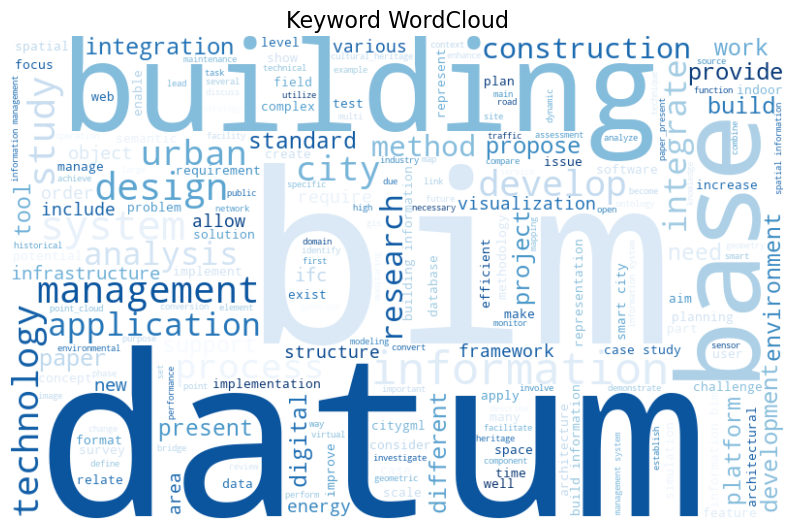

In [141]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 전체 단어를 하나의 문자열로 결합
text = ' '.join([word for doc in data_lemmatized for word in doc])

# WordCloud 객체 생성 (구름 모양 설정)
wordcloud = WordCloud(width=800, height=500,
                      background_color='white',
                      colormap='Blues',
                      contour_color='steelblue',
                      contour_width=2,
                      max_words=200).generate(text)

# 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keyword WordCloud', fontsize=16)
plt.show()


07. LDA Topic modeling_01

In [176]:
# LDA 수행 전 전처리 과정에서 얻은 corpus와 dictionary
id2word = corpora.Dictionary(data_lemmatized)
corpus = [id2word.doc2bow(text) for text in data_lemmatized]

# 최적 토픽 수(k)로 LDA 모델 생성 (예시로 k=10)
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=id2word,
                                   num_topics=9, 
                                   random_state=100,
                                   update_every=1,
                                   chunksize=100,
                                   passes=10,
                                   alpha='auto',
                                   per_word_topics=True)

# 각 논문의 토픽 할당 결과 얻기
def format_topics_sentences(ldamodel, corpus):
    sent_topics_df = pd.DataFrame()

    # 문서별 토픽 할당
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        dominant_topic = row[0][0] if row else None
        sent_topics_df = pd.concat([sent_topics_df, 
                                    pd.DataFrame([[i, dominant_topic]], 
                                                 columns=['Document_No', 'Dominant_Topic'])])
        
    return sent_topics_df.reset_index(drop=True)

# 실제 적용하여 결과 얻기
df_topic_assignment = format_topics_sentences(ldamodel=lda_model, corpus=corpus)



In [177]:
from pprint import pprint

# 생성된 LDA 모델에서 각 토픽의 대표 키워드를 출력
pprint(lda_model.print_topics(num_words=10))

# 각 문서별 토픽 분포를 할당 (확률값 포함)
doc_lda = lda_model[corpus]

# 문서별 할당된 주요 토픽 확인 (상위 5개만 예시 출력)
for i, doc in enumerate(doc_lda[:]):
    print(f"Document {i+1}: {doc}")


[(0,
  '0.054*"model" + 0.049*"datum" + 0.028*"city" + 0.022*"indoor" + '
  '0.021*"citygml" + 0.021*"information" + 0.016*"spatial" + 0.014*"smart" + '
  '0.014*"ifc" + 0.013*"method"'),
 (1,
  '0.035*"bim" + 0.019*"information" + 0.017*"base" + 0.016*"technology" + '
  '0.013*"urban" + 0.012*"construction" + 0.012*"design" + 0.011*"study" + '
  '0.011*"architecture" + 0.009*"datum"'),
 (2,
  '0.006*"pollutant" + 0.006*"organic" + 0.006*"zif" + 0.006*"bimetal" + '
  '0.005*"optimise" + 0.004*"photocatalysis" + 0.004*"ion" + 0.004*"electron" '
  '+ 0.004*"kinetic" + 0.004*"blue"'),
 (3,
  '0.030*"energy" + 0.026*"building" + 0.017*"design" + 0.010*"simulation" + '
  '0.010*"base" + 0.009*"system" + 0.009*"ict" + 0.008*"model" + '
  '0.008*"district" + 0.008*"performance"'),
 (4,
  '0.043*"difficult" + 0.036*"fire" + 0.023*"solar" + 0.017*"correlation" + '
  '0.009*"pilot" + 0.009*"window" + 0.008*"emergency" + 0.007*"smoke" + '
  '0.007*"prototype" + 0.006*"panel"'),
 (5,
  '0.010*"hol

08. Select the optimal topic

Number of Topics: 2, Coherence Score: 0.3141
Number of Topics: 3, Coherence Score: 0.2975
Number of Topics: 4, Coherence Score: 0.2946
Number of Topics: 5, Coherence Score: 0.3060
Number of Topics: 6, Coherence Score: 0.3136
Number of Topics: 7, Coherence Score: 0.3353
Number of Topics: 8, Coherence Score: 0.3288
Number of Topics: 9, Coherence Score: 0.3576
Number of Topics: 10, Coherence Score: 0.3269
Number of Topics: 11, Coherence Score: 0.3385
Number of Topics: 12, Coherence Score: 0.3348
Number of Topics: 13, Coherence Score: 0.3111
Number of Topics: 14, Coherence Score: 0.3588
Number of Topics: 15, Coherence Score: 0.3662


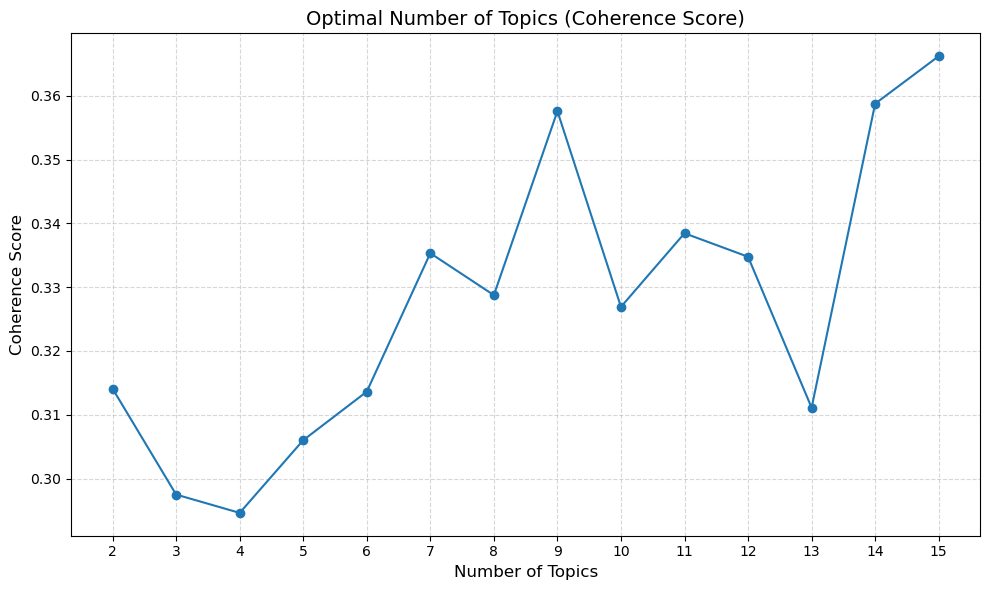

✅ Optimal Number of Topics: 15


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LdaModel
import matplotlib.pyplot as plt

# 최소 및 최대 토픽 수 설정
min_topics, max_topics = 2, 15
coherence_lda = []

# 최적 토픽 수 찾기
for num_topics in range(min_topics, max_topics + 1):
    model = LdaModel(
        corpus=corpus, 
        num_topics=num_topics, 
        id2word=id2word,
        random_state=100,
        update_every=1,
        chunksize=100,
        passes=5,
        iterations=10,
        alpha='auto',
        eta='auto',
        per_word_topics=True
    )
    
    coherence = CoherenceModel(
        model=model, 
        texts=data_lemmatized, 
        dictionary=id2word, 
        coherence='c_v' # c_v
    )
    
    coherence_score = coherence.get_coherence()
    coherence_lda.append(coherence_score)
    print(f'Number of Topics: {num_topics}, Coherence Score: {coherence_score:.4f}')

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(min_topics, max_topics + 1), coherence_lda, marker='o')
plt.xticks(range(min_topics, max_topics + 1))
plt.xlabel('Number of Topics', fontsize=12)
plt.ylabel('Coherence Score', fontsize=12)
plt.title('Optimal Number of Topics (Coherence Score)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 최적의 토픽 수 출력
optimal_topics = coherence_lda.index(max(coherence_lda)) + min_topics
print(f'✅ Optimal Number of Topics: {optimal_topics}')


09. Final_LDA topic modeling & viz

In [198]:
# ===== LDA 모델 구축 (최적 토픽수: 8) =====
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=12,
    random_state=100,
    update_every=1,
    chunksize=200,
    passes=20,
    iterations=10,
    alpha='auto',
    eta='auto',
    per_word_topics=True
)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

pprint(doc_lda)

[(0,
  '0.028*"model" + 0.025*"spatial" + 0.024*"indoor" + 0.023*"city" + '
  '0.023*"smart" + 0.022*"base" + 0.022*"datum" + 0.022*"build" + '
  '0.021*"process" + 0.020*"implement"'),
 (1,
  '0.044*"design" + 0.040*"urban" + 0.037*"architecture" + 0.031*"field" + '
  '0.029*"technology" + 0.029*"planning" + 0.028*"architectural" + 0.018*"bim" '
  '+ 0.016*"information" + 0.015*"application"'),
 (2,
  '0.023*"technology" + 0.012*"safety" + 0.010*"industry" + 0.010*"network" + '
  '0.009*"location" + 0.009*"construction" + 0.009*"study" + 0.008*"building" '
  '+ 0.008*"performance" + 0.008*"evaluation"'),
 (3,
  '0.044*"web" + 0.038*"city" + 0.033*"model" + 0.033*"system" + '
  '0.029*"service" + 0.025*"smart" + 0.023*"method" + 0.020*"datum" + '
  '0.019*"object" + 0.016*"propose"'),
 (4,
  '0.036*"bim" + 0.031*"building" + 0.025*"information" + 0.024*"model" + '
  '0.016*"energy" + 0.014*"integration" + 0.014*"base" + 0.012*"integrate" + '
  '0.011*"system" + 0.010*"project"'),
 (5,


In [197]:
import pyLDAvis.gensim_models

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)

pyLDAvis.save_html(vis, '/home/lhshrk/bim_gis_integration_LDA_analysis/data/lda_vis.html')

vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.110106  0.156448       1        1  27.760527
1      0.129478  0.218338       2        1  27.560169
0      0.262651 -0.080859       3        1  16.989692
10    -0.013060  0.007328       4        1   7.513717
6      0.153460  0.132569       5        1   7.025795
9      0.103938 -0.114509       6        1   5.791380
8      0.195577 -0.244168       7        1   5.227296
4     -0.214297 -0.041045       8        1   1.685014
11    -0.197249 -0.015716       9        1   0.327617
2     -0.177954 -0.006471      10        1   0.056918
5     -0.177356 -0.006426      11        1   0.046002
7     -0.175292 -0.005488      12        1   0.015873, topic_info=             Term        Freq       Total Category  logprob  loglift
94          model  975.000000  975.000000  Default  30.0000  30.0000
189        system  426.000000  426.000000  Default  29.0000  29.0000
712        indoor  245.000000  245.000000  Default  28.0000  28.0000
158    management  302.000000  302.000000  Default  27.0000  27.0000
12          datum  717.000000  717.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
45       software    0.001703   77.270095  Topic12  -8.3116  -1.9746
56       analysis    0.001703  205.773757  Topic12  -8.3116  -2.9541
67   construction    0.001703  262.675779  Topic12  -8.3116  -3.1982
72      different    0.001703  122.928121  Topic12  -8.3116  -2.4389
87      integrate    0.001703  201.611846  Topic12  -8.3116  -2.9337

[649 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
126       1  0.436368   achieve
126       5  0.152729   achieve
126       6  0.414549   achieve
2553      2  0.979669  actively
2218      6  0.945169       ade
...     ...       ...       ...
1818      5  0.907755    weight
932       8  0.908686    window
802       1  0.044416     world
802       2  0.111041     world
802       3  0.843913     world

[750 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 11, 7, 10, 9, 5, 12, 3, 6, 8])

10. 연도별 그래프 시각화

✅ 연도별 주제 분류 결과(전체):
Topic              1   2   3  4  5  6  7  8
Publication_Year                           
2008               2   1   0  0  0  0  1  0
2009               3   2   1  0  0  0  0  0
2010               5   5   0  1  0  0  2  0
2011               2   3   0  0  0  0  2  0
2012               5   5   1  2  0  0  0  0
2013               4   6   2  2  1  0  2  0
2014               3   9   1  0  0  0  0  0
2015               4   6   2  4  0  0  1  0
2016               3   8   5  6  1  0  0  0
2017               6  18   9  7  0  1  3  0
2018               7  16   3  2  0  0  1  0
2019               2  17   2  5  1  0  1  0
2020              12  30  18  7  7  0  7  1
2021               2   7   3  2  0  0  1  0
2022               5  20   9  6  1  0  6  0
2023               1  15   4  0  1  1  1  0
2024               8   9   9  1  1  0  0  0


<Figure size 1200x700 with 0 Axes>

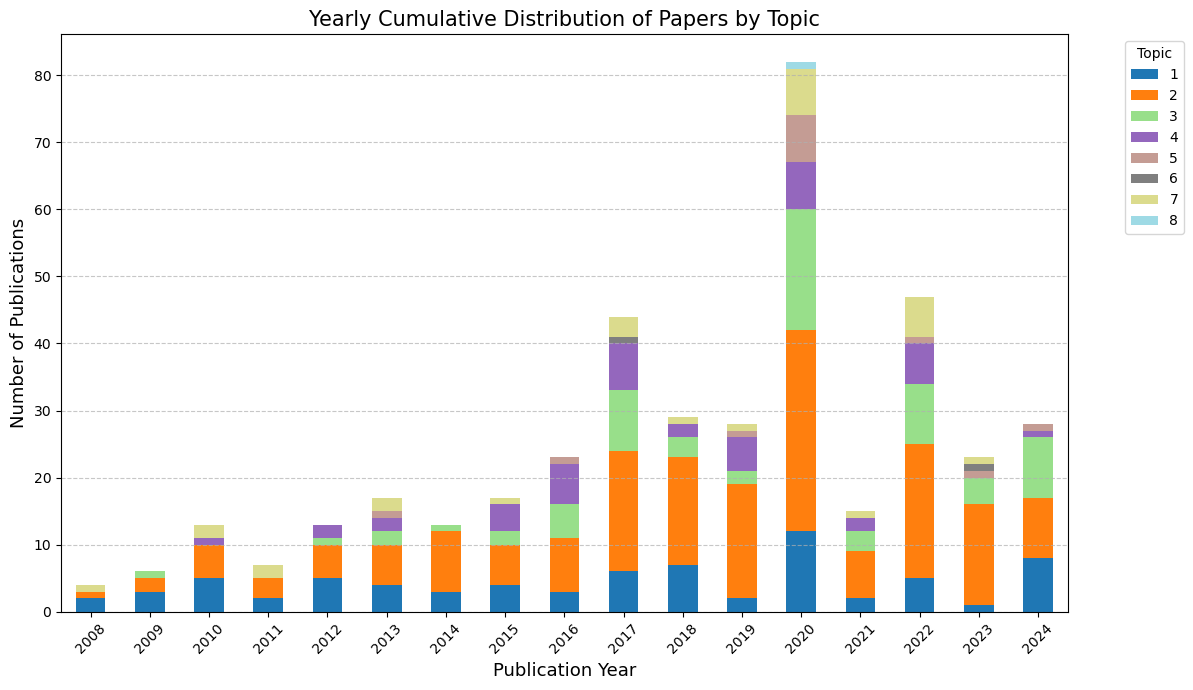

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# (1) 각 문서에 주요 주제 할당 (다시 수행)
main_topics = []
for doc in lda_model[corpus]:
    doc_topics = sorted(doc[0], key=lambda x: x[1], reverse=True)
    main_topics.append(doc_topics[0][0] + 1 if doc_topics else None)  # +1로 주제를 1부터 시작

# DataFrame 생성: 연도별 주제 할당
df_topic_year = pd.DataFrame({
    'Publication_Year': documents['Publication_Year'],
    'Topic': main_topics
})

# (2) 연도별 토픽별 논문 수 집계
trend_data = df_topic_year.groupby(['Publication_Year', 'Topic']).size().unstack(fill_value=0)

# 모든 주제(1~10) 강제 포함
for topic in range(1, 9):  # 토픽 1~10
    if topic not in trend_data.columns:
        trend_data[topic] = 0  # 누락 주제 추가 및 0으로 채우기

# 주제 번호순 정렬
trend_data = trend_data[sorted(trend_data.columns)]

# 연도순 정렬
trend_data = trend_data.sort_index()

# (3) 전체 연도별 주제별 논문 개수 출력 확인
print("✅ 연도별 주제 분류 결과(전체):")
print(trend_data)

# (4) 누적 막대그래프 시각화
plt.figure(figsize=(12, 7))
trend_data.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 7))

plt.title('Yearly Cumulative Distribution of Papers by Topic', fontsize=15)
plt.xlabel('Publication Year', fontsize=13)
plt.ylabel('Number of Publications', fontsize=13)
plt.xticks(rotation=45)

plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 저장 (선택사항)
plt.savefig('/home/lhshrk/bim_gis_integration_LDA_analysis/data/final_yearly_topic_distribution.png')

plt.show()